In [8]:
# Import library
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [9]:
current_path = os.getcwd()
os.chdir(os.path.join(os.getcwd(),"CSV"))

# Read CSV Files and Import Dataframes
fear = pd.read_csv("fear.csv", header=None)
angry = pd.read_csv("angry.csv", header=None)
happy = pd.read_csv("happy.csv", header=None)
sad = pd.read_csv("sad.csv", header=None)
neutral = pd.read_csv("neutral.csv", header=None)

print("The shape of fear is: ", fear.shape)
print("The shape of angry is: ", angry.shape)
print("The shape of happy is: ", happy.shape)
print("The shape of sad is: ", sad.shape)
print("The shape of neutral is: ", neutral.shape)

The shape of fear is:  (5116, 2)
The shape of angry is:  (4954, 2)
The shape of happy is:  (8989, 2)
The shape of sad is:  (6078, 2)
The shape of neutral is:  (6199, 2)


In [10]:
# Train/Test Dataset Split
train_0, test_0 = train_test_split(fear, test_size=0.2, random_state=42)
train_1, test_1 = train_test_split(angry, test_size=0.2, random_state=42)
train_2, test_2 = train_test_split(happy, test_size=0.2, random_state=42)
train_3, test_3 = train_test_split(sad, test_size=0.2, random_state=42)
train_4, test_4 = train_test_split(neutral, test_size=0.2, random_state=42)

# Concatenate Train/Test into Dataframes
train_data = pd.concat([train_0, train_1, train_2, train_3, train_4], ignore_index=True)
test_data = pd.concat([test_0, test_1, test_2, test_3, test_4], ignore_index=True)

# Define Dataframe Columns
train_data.columns = ["image", "label"]
test_data.columns = ["image", "label"]

# Remove rows with columns name rather than images
train_data = train_data[train_data["label"] != "label"]
test_data = test_data[test_data["label"] != "label"]

print("Shape of train_data:", train_data.shape)
print("Shape of test_data:", test_data.shape)

# Save Train/Test Set into CSV file
train_data.to_csv("train_data.csv", index=False)
test_data.to_csv("test_data.csv", index=False)

os.chdir(current_path)

Shape of train_data: (25063, 2)
Shape of test_data: (6268, 2)


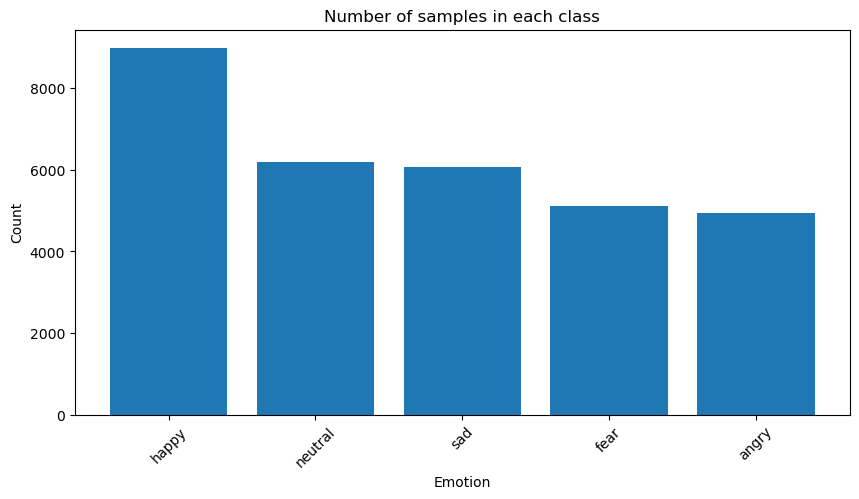

In [12]:
# Concatenate images from all classes
df = pd.concat([fear, angry, happy, sad, neutral], ignore_index=True)
df.columns = ["image", "label"]
df = df[df["label"] != "label"]

# Dataframe Preprocessing
counts = df["label"].value_counts()
counts_list = list(counts.items())
counts = [count for label, count in counts_list]

# Plot Images Distribution Bar Graph
emotion_names = ["happy", "neutral", "sad", "fear", "angry"]
plt.figure(figsize=(10, 5))
plt.bar(emotion_names, counts)
plt.xticks(rotation=45)
plt.title("Number of samples in each class")
plt.xlabel("Emotion")
plt.ylabel("Count")
#plt.savefig("class_dist.png")
plt.show()